# <center> <b>  SUPERMARKET WEEKLY SALES REPORT

<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Overview
    
This is historical data including sales from 2010-02-05 to 2012-11-01 in the file "Walmart_Store_sales.csv". About the dataset "Walmart Dataset (Retail)":

1. Store - The Store ID number.
2. Date - The week of sales.
3. Weekly_Sales - Sales record in the week of given store.
4. Holiday_Flag - Indicate whether the week has Public Holiday or not. (1 – Holiday week, 0 – Non-holiday week)
5. Temperature - Average temperature of the week.
6. Fuel_Price - Average fuel price of the week in the region.
7. CPI – Prevailing Consumer Price Index.
8. Unemployment - Prevailing Unemployment Rate.

Holiday Events:
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13    

<b><u>Main task</b></u>: Explore the dataset and create models to predict the sales (Weekly_Sales).

### Overall comments:

The dataset describes the activities of 45 stores in 3 years 2010, 2011 and 2012 with a total number of sales revenue of 6428 times. In general, the features are distributed relatively evenly, the dataset does not appear missing values.

This is a dataset with 93% data recorded during weekdays and approximately 7% recorded during holidays

The majority of holidays will have higher average sales than regular days. The total weekly sales of stores fluctuates unevenly, with some stores having sales about 6-7 times higher than others.

<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Content
1. Import data.
2. EDA.
3. Features Selection.
4. Model development.
5. Conclusion.
6. Recommendation and Benefits.

# Library

pip install lightgbm

pip install xgboost

pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
from datetime import datetime
%matplotlib inline

# Sklearn
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import ensemble, metrics, model_selection, linear_model
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,classification_report
from lightgbm import LGBMRegressor,log_evaluation
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import ensemble, metrics, model_selection, linear_model
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

In [2]:
palette = ["#0071CE","#FFC220",  "#76c043", "#78b9e7", "#367c2b", "#007dc6",
           "#367c2b", "#76c043"]
sns.set_style("whitegrid")
sns.set_palette(palette)

## 1. Import dữ liệu

In [3]:
filename = "https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/supemakert_x/Supmarket_X.csv"
filename 

'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/supemakert_x/Supmarket_X.csv'

In [4]:
df = pd.read_csv(filename)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## 2. EDA

### 2.1. Tổng quan.
- Target feature là Weekly_Sales
- Định dạng ngày trong dataset sau quá trình xử lý được chỉnh về cùng định dạng
- Holiday_flag là feature chứa dummy variable(hiện số 1 nếu nó là 1 trong 4 holidays, hiện số 0 nếu nó không là holiday)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum().to_frame()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


#### <u> Nhận xét</u>: 
Không có feature nào xuất hiện trạng thái null

In [7]:
print('No Holiday', round(df['Holiday_Flag'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Holiday', round(df['Holiday_Flag'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Holiday 93.01 % of the dataset
Holiday 6.99 % of the dataset


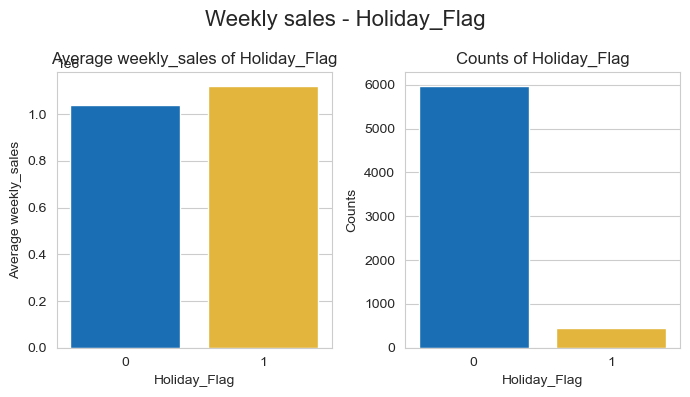

In [8]:
holiday_sale = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_count = df.groupby('Holiday_Flag')['Weekly_Sales'].count()

fig, axes = plt.subplots(1,2, figsize=(7,4), dpi=100)

ax1 = sns.barplot(x=holiday_sale.index, y=holiday_sale.values, ax=axes[0])
ax1.set_title('Average weekly_sales of Holiday_Flag')
ax1.set_xlabel('Holiday_Flag')
ax1.set_ylabel('Average weekly_sales')

ax2 = sns.barplot(x=holiday_count.index,y=holiday_count.values, ax=axes[1])
ax2.set_title('Counts of Holiday_Flag')
ax2.set_xlabel('Holiday_Flag')
ax2.set_ylabel('Counts')

plt.suptitle('Weekly sales - Holiday_Flag', fontsize = 16)
fig.tight_layout()
plt.show()

#### <u> Nhận xét</u>: 
Đây là một bộ dataset với 93% dữ liệu ghi nhận trong ngày thường và xấp xỉ 7% ghi nhận trong kỳ nghỉ lễ

In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [11]:
df['Date']  =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [12]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
df['Year'], df['Month'] = df['Date'].dt.year, df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Day'] = df['Date'].dt.day

In [14]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5


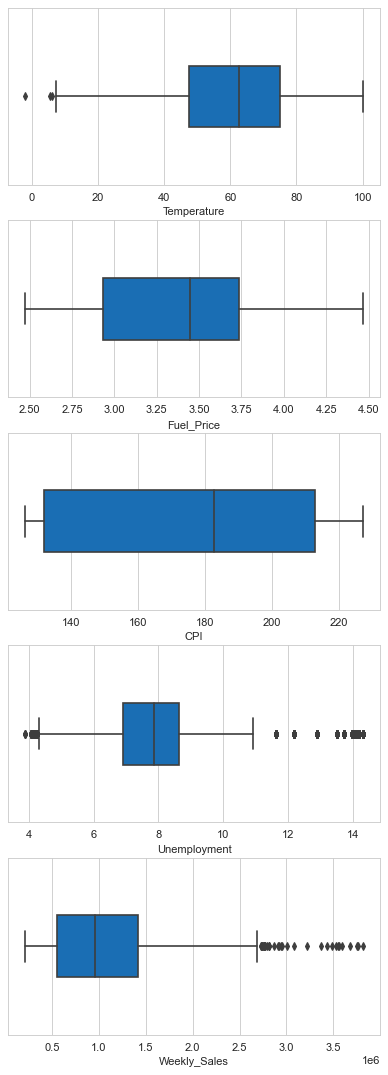

In [15]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(5, figsize=(6,17), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i], width=0.35)

import warnings
warnings.filterwarnings('ignore')

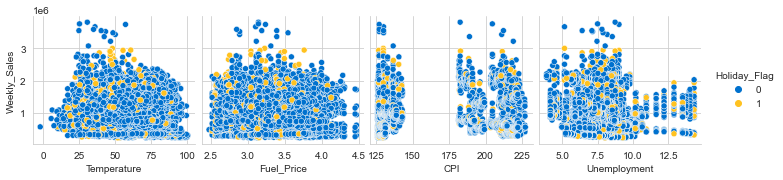

In [16]:
pp = sns.pairplot(data=df,
                  y_vars=['Weekly_Sales'],
                  x_vars=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
                  hue='Holiday_Flag')

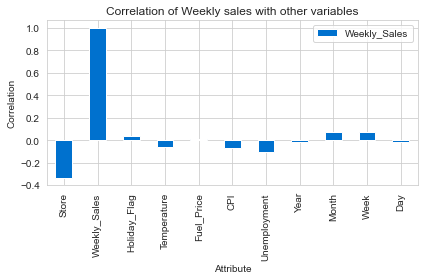

In [17]:
#Relationship of Weekly Sales among Temperature, FuelPrice, CPI, Holiday and Store
df_corr = df.corr()
ax=df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

#### <u> Nhận xét</u>: 
Các features Store, Temperature, Unemployment, Fuel_Price, CPI, Holiday_Flag, Week, Month, Quarter, Year có mối tương quan rất yếu với Weekly_Sales (không có features nào vượt 0.5)

### 2.2. Sales Analysis.

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 1600x480 with 0 Axes>

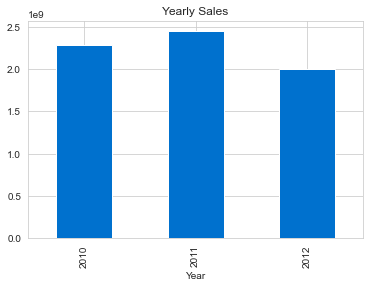

In [18]:
plt.figure(figsize=(20,6), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False, color = palette)
plt.title('Yearly Sales')

#### <u> Nhận xét</u>: 
Doanh thu hằng năm của siêu thị X không có sự biến động quá nhiều qua các năm, cao nhất vào năm 2011 và thấp nhất vào năm 2012

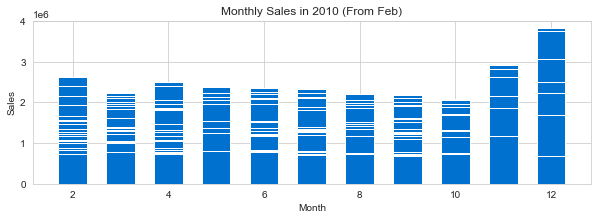

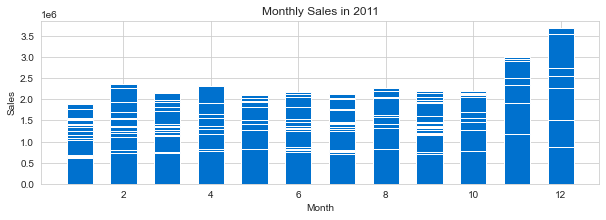

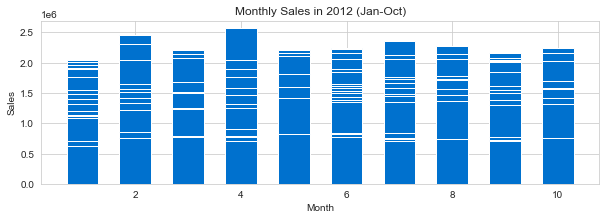

In [19]:
# fist line: Doanh số các tuần trong năm 2010 theo tháng 
plt.figure(figsize=(10,3))
df_2010 = df[df["Year"] ==2010]
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2010 (From Feb)')
plt.bar(df_2010['Month'],df_2010['Weekly_Sales'], width=0.6)
 
# second line: Doanh số các tuần trong năm 2011 theo tháng 
df_2011 = df[df["Year"]==2011]
plt.figure(figsize = (10, 3))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2011')
plt.bar(df_2011['Month'],df_2011['Weekly_Sales'], width=0.6)

# third line: Doanh số các tuần trong năm 2012 theo tháng 
df_2012 = df[df["Year"]==2012]
plt.figure(figsize = (10, 3))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales in 2012 (Jan-Oct)')
plt.bar(df_2012['Month'],df_2012['Weekly_Sales'], width=0.6)

# Show the graph
plt.show()

#### <u> Nhận xét</u>: 
- 2010 chứng kiến sự chênh lệch khá lớn giữa tháng 12 so với các tháng còn lại trong năm, với doanh thu trong tháng 12 ghi nhận đạt khoảng 380 triệu, Tháng 12 năm 2011 tiếp tục ghi nhận doanh thu lớn nhất (khoảng 400 triệu đồng) và có sự chênh lệch rất rõ so với các tháng còn lại 
- Năm 2012, sự chênh lệch giữa các tháng là không quá lớn, tháng 4 ghi nhận tổng doanh thu lớn nhất (khoảng 300 triệu đồng)

### 2.3. Stores' Sales Analysis.

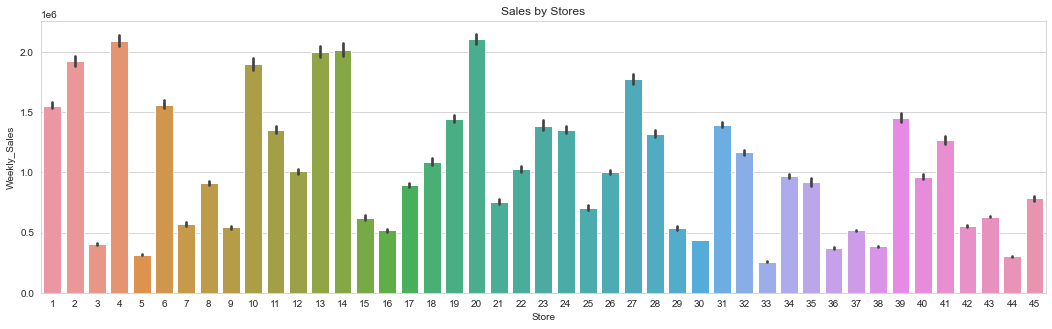

In [20]:
plt.figure(figsize=(18,5))
plt.title('Sales by Stores')
ax = sns.barplot(x='Store', y="Weekly_Sales", data=df)

In [21]:
df_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
df_top5 = df_store.head(5).to_frame().reset_index()
df_top5['Store'].astype('string')

0    20
1     4
2    14
3    13
4     2
Name: Store, dtype: string

<AxesSubplot:title={'center':'Top 5 Stores by Sales'}, xlabel='Store', ylabel='Weekly_Sales'>

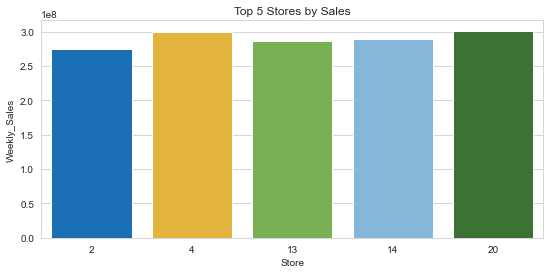

In [22]:
plt.figure(figsize=(9,4))
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Top 5 Stores by Sales')
sns.barplot(data = df_top5, x = df_top5['Store'],y = df_top5['Weekly_Sales'], palette = palette)

#### <u> Nhận xét</u>:
Các cửa hàng 20, 4, 14, 13, 2 có tổng doanh số tích lũy lớn nhất.

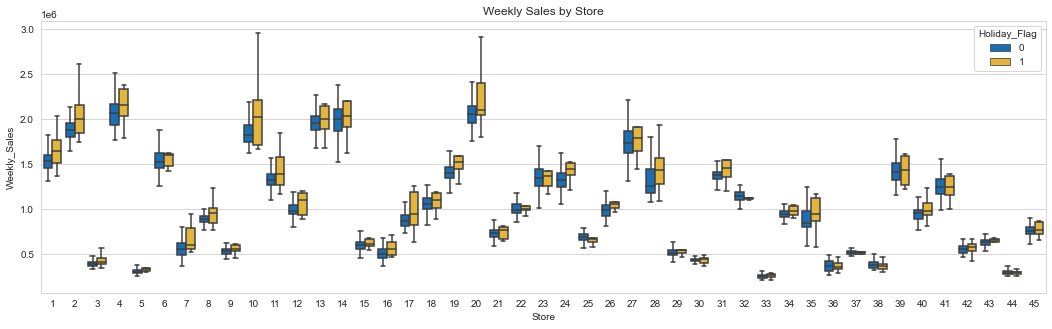

(Text(0.5, 1.0, 'Weekly Sales by Store'), None)

In [23]:
def boxplot (df, var_label, var_y, var_class, outliers=True):
    plt.figure(figsize = (18,5))
    if var_class!="":
        fig = sns.boxplot(x = var_class
                          ,y =  var_y
                          ,data = df[[var_class, var_y, var_label]]
                          ,showfliers = outliers
                          ,hue = var_label                     )
    else:
        fig = sns.boxplot(x = var_label ,y = var_y
                          ,data = df[[var_label,var_y]]
                          ,showfliers = outliers
                     )
    return plt.title('Weekly Sales by Store'),plt.show()

boxplot(df,"Holiday_Flag","Weekly_Sales","Store",False)


#### <u> Nhận xét</u>: 
Tổng doanh thu hằng tuần của các cửa hàng biến động không đều, có những cửa hàng có doanh thu cao gấp khoảng 6-7 lần những cửa hàng khác, tần suất của việc này không nhiều và nguyên nhân có thể xuất phát từ việc cửa hàng không có cách tiếp thị khách hàng đúng cách hoặc bởi vì đặc điểm địa lý, quy mô của cửa hàng, văn hoá địa phương.

In [24]:
# Cửa hàng có hệ số biến thiên cao nhất 
coefficient_all = ((df.groupby('Store')['Weekly_Sales'].std())/(df.groupby('Store')['Weekly_Sales'].mean()))*100
print("Cửa hàng có hệ số biến thiên cao nhất là cửa hàng số {} ".format(coefficient_all.idxmax()))

Cửa hàng có hệ số biến thiên cao nhất là cửa hàng số 35 


<AxesSubplot:title={'center':'Weekly Sales by Store'}, xlabel='Weekly_Sales', ylabel='Density'>

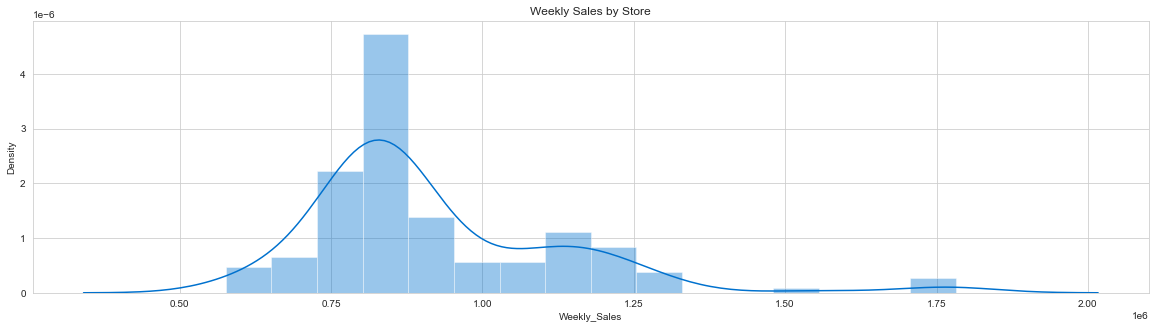

In [26]:
stores = df.groupby('Store')
store_35 = stores.get_group(35)
plt.figure(figsize=(20,5))
plt.title('Weekly Sales by Store')
sns.distplot(store_35.Weekly_Sales)

#### <u> Nhận xét</u>: 
Sơ đồ phân phối cho cửa hàng số 35 có xu hướng đi lệch sang phải (right-skew), mức doanh số sẽ hầu hết nằm ở trong khoảng 800000

### 2.4. Holiday and Non_Holiday Sales Analysis:

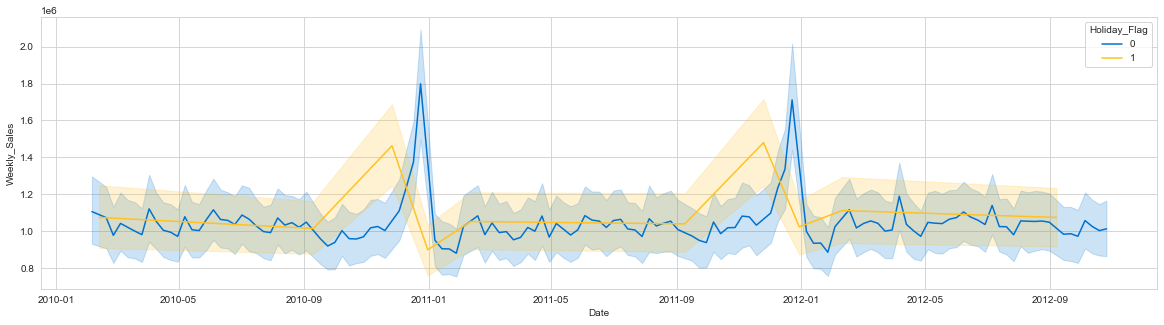

In [27]:
# so sánh sales holiday vs sales non-holiday overtime
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", hue = "Holiday_Flag")
plt.show()

#### <u> Nhận xét</u>:  
Khi nhìn vào biểu đồ và so sánh performance của holiday sales so với non-holiday, có thể thấy trung bình các ngày lễ có lượng sales vượt trội hơn ngày thường, tuy nhiên số ít ngày bán được ít hơn ngày thường.

In [31]:
# Trung bình sales holiday vs trung bình sales non-holiday

print("Trung bình ngày lễ:",df_holiday["Weekly_Sales"].mean())
print("Trung bình ngày thường:",df_noholiday["Weekly_Sales"].mean())

Trung bình ngày lễ: 1122887.8923555554
Trung bình ngày thường: 1041256.3802088564


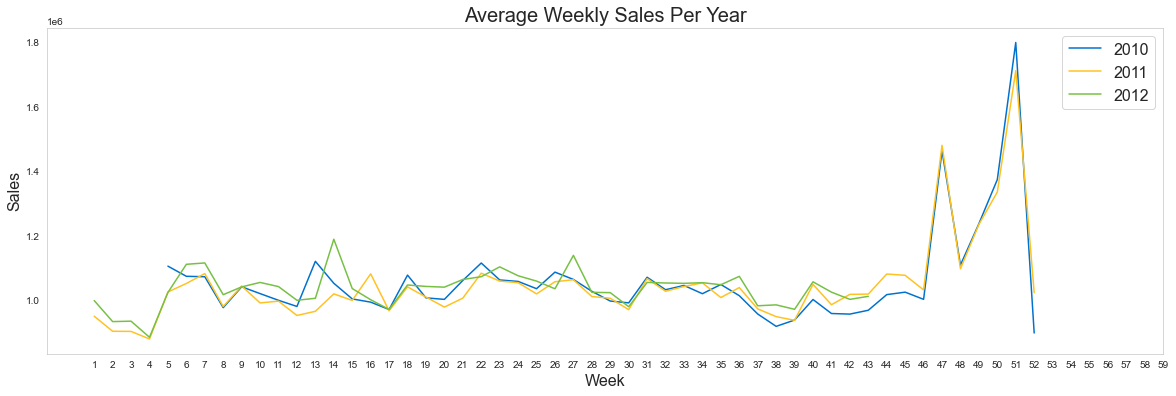

In [32]:
#So sánh doanh thu theo tuần của các năm
weekly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Week']).mean()

plt.figure(figsize=(20,6))

sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)

plt.show()

### <u> Nhận xét</u>: 
Trong năm 2010, 2011, các tuần thanksgiving và tuần đầu trước Christmas có sự tăng đột biến về doanh thu
Có thể thấy, xu hướng sales từng năm là tương tự nhau và có xu hướng tăng đột biến từ tuần 46 đến 52 - các tuần cuối năm tập trung nhiều ngày lễ. Như vậy có thể thấy ngày lễ có ảnh hưởng rõ ràng lên sales của tuần

In [33]:
Avg_H_Sales = df_holiday.groupby(["Year", "Month"])[["Weekly_Sales"]].mean()
Avg_NH_Sales = df_noholiday.groupby(["Year", "Month"])[["Weekly_Sales"]].mean()
Avg_H_Sales["Weekly_Sales_Holiday"] = Avg_H_Sales["Weekly_Sales"]

Avg_H_Sales_Y = Avg_H_Sales.drop(["Weekly_Sales"], axis = 1).style.format("{:.1f}")
Avg_H_Sales_Y

In [34]:
Avg_NH_Sales_Y = Avg_NH_Sales.style.format("{:.1f}")
Avg_NH_Sales_Y

### <u> Nhận xét</u>:  
Có thể thấy trong các tháng có lễ, trung bình sales của tuần có ngày lễ cao hơn hẳn trung bình tuần non-holiday, cụ thể khi nhìn vào tháng 2/2010, 11/2010 có thể thấy Super_Bowl và Thanksgiving có khả năng thu hút demand tốt.

#### So sánh performance của các holiday với nhau 

In [35]:
#Tạo range các ngày lễ
Super_Bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
Labour_Day =  ['2010-09-10', '2011-09-09', '2012-09-07']
Thanksgiving =  ['2010-11-26', '2011-11-25', '23-11-2012']
Christmas = ['2010-12-31', '2011-12-30', '28-12-2012']

In [36]:
df["Super_Bowl"] = np.where(df.Date.astype('string').isin(Super_Bowl), 1, 0) 
df["Labour_Day"] = np.where(df.Date.astype('string').isin(Labour_Day), 1, 0) 
df["Thanksgiving"] = np.where(df.Date.astype('string').isin(Thanksgiving), 1, 0) 
df["Christmas"] = np.where(df.Date.astype('string').isin(Christmas), 1, 0) 

In [37]:
# Đóng góp của từng ngày lễ vào tổng doanh thu ngày lễ
data_pie = [] 
data_pie.append(df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].sum())
data_pie.append(df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].sum()) 
data_pie.append(df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].sum()) 
data_pie.append(df.loc[df["Christmas"] == 1]["Weekly_Sales"].sum())

labels = ["Super_Bowl", "Labour_Day", "Thanksgiving", "Christmas"]

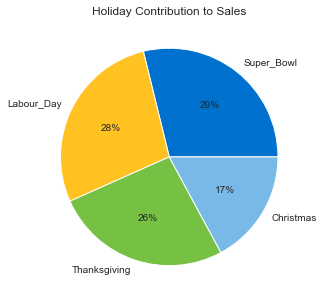

In [38]:
plt.figure(figsize=(5,5))
colors = sns.color_palette('bright')[0:4]
plt.title('Holiday Contribution to Sales')
plt.pie(data_pie, labels = labels, autopct='%.0f%%')

plt.show()

In [39]:
# So sánh trung bình doanh thu của từng tuần lễ

Super_Bowl_Sales = df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].mean()
Labour_Day_Sales = df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].mean()
Thanksgiving_Sales = df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].mean()
Christmas_Sales = df.loc[df["Christmas"] == 1]["Weekly_Sales"].mean()


Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales}

pd.DataFrame(Mean_Sales, index = range(len(Mean_Sales)))[:1].style.format("{:.1f}")

,Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales
0,1079128.0,1042427.3,1471273.4,960833.1


In [40]:
# So sánh trung vị doanh thu của từng tuần lễ (tránh tác động của outlier)


Super_Bowl_Sales2 = df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].median()
Labour_Day_Sales2 = df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].median()
Thanksgiving_Sales2 = df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].median()
Christmas_Sales2 = df.loc[df["Christmas"] == 1]["Weekly_Sales"].median()


Median_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales2,
              'Labour_Day_Sales': Labour_Day_Sales2,
              'Thanksgiving_Sales':Thanksgiving_Sales2,
              'Christmas_Sales': Christmas_Sales2}

pd.DataFrame(Median_Sales , index = range(len(Median_Sales )))[:1].style.format("{:.1f}")

,Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales
0,1015654.6,976415.6,1327536.2,889822.0


In [41]:
print(
    df.loc[df["Super_Bowl"] == 1].shape,
    df.loc[df["Labour_Day"] == 1].shape,
    df.loc[df["Thanksgiving"] == 1].shape,
    df.loc[df["Christmas"] == 1].shape
)

(135, 16) (135, 16) (90, 16) (90, 16)


In [42]:
# Hệ số biến thiên doanh thu của từng holiday
Super_Bowl_Sales = df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].std()/df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].mean()*100
Labour_Day_Sales = df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].std()/df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].mean()*100
Thanksgiving_Sales = df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].std()/df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].mean()*100
Christmas_Sales = df.loc[df["Christmas"] == 1]["Weekly_Sales"].std()/df.loc[df["Christmas"] == 1]["Weekly_Sales"].mean()*100

coefficient_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales}

pd.DataFrame(coefficient_Sales , index = range(len(Mean_Sales )))[:1]

,Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales
0,53.464053,51.600173,54.187582,52.374068


#### <u> Nhận xét</u>:  
- Có thể thấy, dù tổng doanh thu đến từ Super_bowl cao nhất với 29%, doanh thu trung bình lại kém xa so với Thanksgiving.
- Xem xét nhận thấy số lượng tuần lễ Super_Bowl cao hơn Thanksgiving nên tổng doanh thu cao hơn là hợp lí.
- Trong 4 ngày lễ, Thanksgiving là lễ khách hàng chi tiêu nhiều nhất

## 3. Features Selection.

<AxesSubplot:>

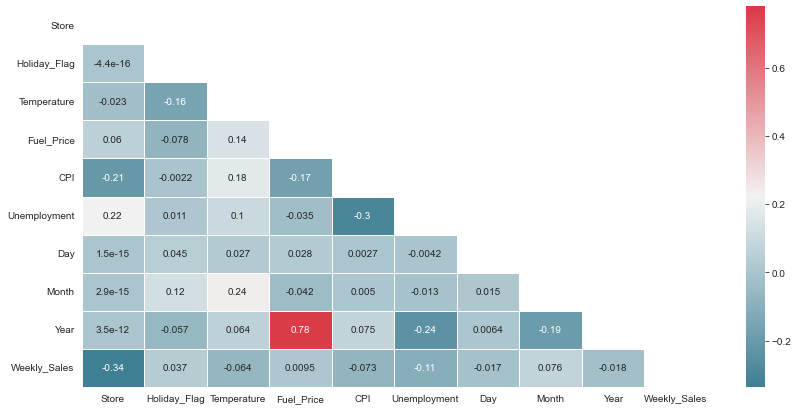

In [43]:
fig, ax = plt.subplots(figsize=(14, 7))
corr = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year','Weekly_Sales']].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot = True, linewidth=.8, cmap=cmap, mask=mask)

#### <u> Nhận xét</u>: 
Year có correlation cao với Fuel Price (0.78)

[0.6739474  0.0037502  0.01183036 0.00876417 0.15200093 0.09775447
 0.02094131 0.02954078 0.00147038]


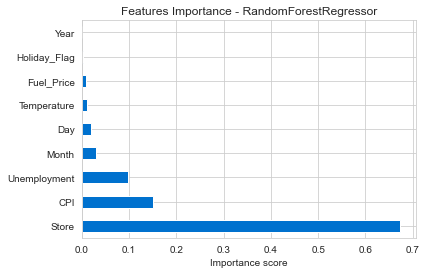

In [44]:
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]  #independent columns
y = df['Weekly_Sales']    #target column i.e price range
model = RandomForestRegressor(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance score')
plt.title('Features Importance - RandomForestRegressor')
plt.show()

[0.65355261 0.00920143 0.01606909 0.01164109 0.15946365 0.09763788
 0.01825667 0.02329261 0.01088495]


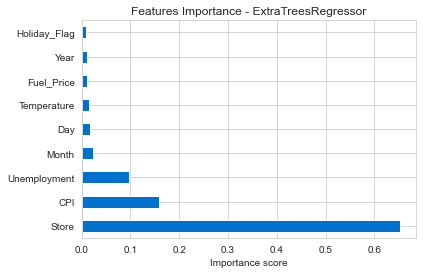

In [45]:
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]  #independent columns
y = df['Weekly_Sales']    #target column i.e price range
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance score')
plt.title('Features Importance - ExtraTreesRegressor')
plt.show()

#### <u> Nhận xét</u>:  
- 2 models cho kết quả khá tương tự nhau với Store, CPI, Unemployment cho kết quả cao nhất về tầm quan trọng
- Cùng với Nhận thấy Year có correlation cao với Fuel Price và tầm quan trọng của Year với weekly sales không cao
- => drop year khỏi features; encode stores để đưa vào model
- Dựa vào quan sát, EDA, 3 charts ở trên, nhóm lựa chọn hấu hết features để build models: ['Store', 'CPI', 'Unemployment', 'Day', 'Month', 'Fuel_Price', 'Temperature', 'Holiday_Flag'] (Các features không có dấu hiệu của đa cộng tuyến)

## 4. Model development.

### 4.1. Pre-processing. 

In [46]:
x = df[['Store', 'CPI', 'Unemployment', 'Day', 'Month', 'Fuel_Price', 'Temperature', 'Holiday_Flag']]
y = df['Weekly_Sales']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0, stratify = x['Holiday_Flag'])

In [48]:
# Model evaluation
def ml_error(model_name, df, y , pred):
  
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))   
    mape = np.mean(np.abs((y - pred)/y))*100
    r2 = r2_score(y, pred)

    return pd.DataFrame({'Model Name' : model_name,
                        'MAE' : mae,
                        'RMSE': rmse,
                        'MAPE': mape,
                        'R_square': r2},
                        index = [0])
# MAPE < 5% ---> mô hình tốt

In [49]:
# Function cho GridSearch để tìm tham số tốt nhất
def model (model,parameters, X, Y, cv):
    # model
    mod = model
    mod_grid = GridSearchCV(mod, parameters, cv=cv)
    mod_grid.fit(X, Y)
    
    return mod_grid,mod_grid.best_params_

In [50]:
# Perform features standardization.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [84]:
from sklearn import datasets

### 4.2. Model Testing.

#### 4.2.1. LinearRegression.

In [59]:
# Perform Linear Regression model training and print out Train & Test Accuracy.
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

from math import sqrt

print("R2_score_LR:",r2_score(y_test, lr_y_pred))
print("MSE_score_LR:", mean_squared_error(y_test, lr_y_pred))
print("RMSE_LR:",sqrt(mean_squared_error(y_test, lr_y_pred)))

R2_score_LR: 0.14201802151853116
MSE_score_LR: 260836620722.1759
RMSE_LR: 510721.6665877569


#### <u> Nhận xét</u>:  Kết quả của Linear khá là thấp => có khả năng model không đủ phức tạp

#### 4.2.2. PolynomialFeatures.

In [52]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)
poly_lr_y_pred= lr.predict(x_test_poly)

from math import sqrt

print("R2_score_Poly+LR:",r2_score(y_test, poly_lr_y_pred))
print("MSE_score_Poly+LR:", mean_squared_error(y_test, poly_lr_y_pred))
print("RMSE_Poly+LR:",sqrt(mean_squared_error(y_test, poly_lr_y_pred)))

R2_score_Poly+LR: 0.5598891342032569
MSE_score_Poly+LR: 133798883725.63641
RMSE_Poly+LR: 365785.2973065435


#### 4.2.3. RandomForestRegressor.

#### 4.2.4. XGBRegressor.

In [54]:
XGB = XGBRegressor()

XGB.fit(x_train,y_train)
XGB_y_pred = XGB.predict(x_test)

print("R2_score_XGB:",r2_score(y_test, XGB_y_pred))
print("MSE_score_XGB:", mean_squared_error(y_test, XGB_y_pred))
print("RMSE_XGB:",sqrt(mean_squared_error(y_test, XGB_y_pred)))

R2_score_XGB: 0.9836984018358568
MSE_score_XGB: 4955877727.212397
RMSE_XGB: 70397.99519313315


#### 4.2.5. DecisionTreeRegressor.

In [82]:
DTR = DecisionTreeRegressor(max_depth=3,random_state=0)

DTR.fit(x_train,y_train)
DTR_y_pred = DTR.predict(x_test)

print("R2_score_DTR:",r2_score(y_test, DTR_y_pred))
print("MSE_score_DTR:", mean_squared_error(y_test, DTR_y_pred))
print("RMSE_DTR:",sqrt(mean_squared_error(y_test, DTR_y_pred)))

R2_score_DTR: 0.45311099184429504
MSE_score_DTR: 166260695883.04013
RMSE_DTR: 407750.7766798736


#### 4.2.6. SVR.

In [60]:
SVR_Model = SVR()

SVR_Model.fit(x_train,y_train)
SVR_y_pred = SVR_Model.predict(x_test)

print("R2_score_SVR:",r2_score(y_test, SVR_y_pred))
print("MSE_score_SVR:", mean_squared_error(y_test, SVR_y_pred))
print("RMSE_SVR:",sqrt(mean_squared_error(y_test, SVR_y_pred)))

R2_score_SVR: -0.017648472104933033
MSE_score_SVR: 309377114210.1784
RMSE_SVR: 556216.7870625431


#### 4.2.7. LGBMRegressor.

In [57]:
LGBM = LGBMRegressor()

LGBM.fit(x_train,y_train)
LGBM_y_pred = LGBM.predict(x_test)

print("R2_score_LGBM:",r2_score(y_test, LGBM_y_pred))
print("MSE_score_LGBM:", mean_squared_error(y_test, LGBM_y_pred))
print("RMSE_LGBM:",sqrt(mean_squared_error(y_test, LGBM_y_pred)))

R2_score_LGBM: 0.9814496537763314
MSE_score_LGBM: 5639523607.211279
RMSE_LGBM: 75096.76162932247


#### 4.2.8. KNeighborsRegressor.

In [83]:
KNR = KNeighborsRegressor() 

KNR.fit(x_train,y_train)
KNR_y_pred = KNR.predict(x_test)

print("R2_score_KNR:",r2_score(y_test, KNR_y_pred))
print("MSE_score_KNR:", mean_squared_error(y_test, KNR_y_pred))
print("RMSE_KNR:",sqrt(mean_squared_error(y_test, KNR_y_pred)))

R2_score_KNR: 0.3909224194901413
MSE_score_KNR: 185166753897.3395
RMSE_KNR: 430310.0671577874


#### 4.2.9. Summary.

In [25]:
Result = {'LinearRegression' : [0.14201802151853116,260836620722.1759, 510721.6665877569],
              'PolynomialFeatures': [0.5598891342032569,133798883725.63641,365785.2973065435],
              'RandomForestRegressor': [0.8891665936887682,3694660133.206978,183561.0528767118],
              ' XGBRegressor':[0.9836984018358568,4955877727.212397,70397.99519313315],
              ' DecisionTreeRegressor': [0.45311099184429504,166260695883.04013,407750.7766798736],
               'SVR': [-0.017648472104933033,309377114210.1784,556216.7870625431],
               'LGBMRegressor': [0.9814496537763314,5639523607.211279,75096.76162932247],
               'KNeighborsRegressor': [0.3909224194901413,185166753897.3395,430310.0671577874]
         }

pd.DataFrame(Result , index = ['R2_score', 'MSE_score', 'RMSE']).style.format("{:.5f}")

,LinearRegression,PolynomialFeatures,RandomForestRegressor,XGBRegressor,DecisionTreeRegressor,SVR,LGBMRegressor,KNeighborsRegressor
R2_score,0.14202,0.55989,0.88917,0.98370,0.45311,-0.01765,0.98145,0.39092
MSE_score,260836620722.17590,133798883725.63641,3694660133.20698,4955877727.21240,166260695883.04013,309377114210.17841,5639523607.21128,185166753897.33951
RMSE,510721.66659,365785.29731,183561.05288,70397.99519,407750.77668,556216.78706,75096.76163,430310.06716


#### <u> Nhận xét</u>:  
- Các models: <b><u> XGBRegressor, RandomForestRegressor và LGBMRegressor</b></u> cho giá trị R-Squared khá cao (gần 1).
- => Nhóm dùng 3 models trên tiếp tục Tuning.

### 4.3. Model Tuning.

#### 4.3.1. RandomForestReg.

In [64]:
parameters_RF =   {'n_estimators': [100,150]
                  ,'max_depth': [None]
                  ,'max_features': [0.75]
                  ,"n_jobs":[-1]
                  }
model_RF,best_param_RF = model(RandomForestRegressor(),parameters_RF,x_train,y_train, 4)

In [65]:
best_param_RF

{'max_depth': None, 'max_features': 0.75, 'n_estimators': 100, 'n_jobs': -1}

In [66]:
y_pred_train_RF = model_RF.predict(x_train)
y_pred_test_RF = model_RF.predict(x_test)

Result_RF = ml_error("RF_Train", x_train,y_train,y_pred_train_RF)
Result_RF = Result_RF.append(ml_error("RF_test", x_test,y_test,y_pred_test_RF))
Result_RF

,Model Name,MAE,RMSE,MAPE,R_square
0,RF_Train,22033.508940,42999.003385,2.031276,0.994259
0,RF_test,56725.447218,102415.322594,5.434038,0.965498


#### 4.3.2. LGBMRegressor.

In [67]:
def mod_LGBM(x_train,y_train,x_test,y_test,cv=4):
    from lightgbm import LGBMRegressor,log_evaluation
    from lightgbm import early_stopping
    parameters = {
    "learning_rate": [0.5,0.6,0.7],
    "subsample":[0.75],
    "n_estimators": [150,300,500],
    "max_depth": [15],
    "colsample_bytree":[0.7,0.9],  
    "reg_lambda":[0,1],
    "reg_alpha": [0,1],
       "verbose":[0]
#      "scale_pos_weight": [15],
    #"n_jobs":[-1]
    }    
    eval_set = [(x_train,y_train),(x_test,y_test)]
        
    regressor=LGBMRegressor (objective='regression', seed=0,verbose_eval=False)

    LGBM_grid = GridSearchCV(regressor,parameters,cv=cv)
    LGBM_grid.fit(x_train,y_train
                  ,eval_set=eval_set
                  ,eval_metric=['rmse']
                  ,callbacks=[
                  early_stopping(stopping_rounds=5,first_metric_only=False)
                  ]
                  
                 )

    LGBM_grid.best_params_
    
   
    return LGBM_grid,LGBM_grid.best_params_

In [68]:
%%capture
model_LGBM,best_param_LGBM =mod_LGBM(x_train,y_train,x_test,y_test)

In [69]:
best_param_LGBM

{'colsample_bytree': 0.9,
 'learning_rate': 0.5,
 'max_depth': 15,
 'n_estimators': 150,
 'reg_alpha': 1,
 'reg_lambda': 0,
 'subsample': 0.75,
 'verbose': 0}

In [70]:
y_pred_train_LGBM = model_LGBM.predict(x_train)
y_pred_test_LGBM = model_LGBM.predict(x_test)

Result_LGBM = ml_error("LGBM_Train", x_train,y_train,y_pred_train_LGBM)
Result_LGBM = Result_LGBM.append(ml_error("LGBM_test", x_test,y_test,y_pred_test_LGBM))
Result_LGBM

,Model Name,MAE,RMSE,MAPE,R_square
0,LGBM_Train,36643.753857,53549.734228,4.355051,0.991096
0,LGBM_test,51847.114564,76580.554371,5.963462,0.980709


#### 4.3.3. XGBoosting.

In [71]:
parameters_XGB = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10]
       }

'https://xgboost.readthedocs.io/en/stable/parameter.html'

#### Đoạn code dưới chạy hơi lâu ạ - Máy em chạy khoảng 8 phút.  (╥﹏╥)

In [72]:
model_XGB,best_param_XGB = model(XGBRegressor(),parameters_XGB,x_train,y_train, 4)

In [73]:
best_param_XGB

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 400}

In [79]:
y_pred_train_XGB = model_XGB.predict(x_train)
y_pred_test_XGB = model_XGB.predict(x_test)

Result_XGB = ml_error("XGB_Train", x_train,y_train,y_pred_train_XGB)
Result_XGB = Result_XGB.append(ml_error("XGB_test", x_test,y_test,y_pred_test_XGB))

Result_XGB

,Model Name,MAE,RMSE,MAPE,R_square
0,XGB_Train,9557.393663,13544.270834,1.139470,0.99943
0,XGB_test,42980.163352,66370.844628,4.881089,0.98551


#### 4.3.4. Results.

In [80]:
Result_all = pd.concat([Result_XGB, Result_RF, Result_LGBM],axis = 0)
Result_all

,Model Name,MAE,RMSE,MAPE,R_square
0,XGB_Train,9557.393663,13544.270834,1.139470,0.999430
0,XGB_test,42980.163352,66370.844628,4.881089,0.985510
0,RF_Train,22033.508940,42999.003385,2.031276,0.994259
0,RF_test,56725.447218,102415.322594,5.434038,0.965498
0,LGBM_Train,36643.753857,53549.734228,4.355051,0.991096
0,LGBM_test,51847.114564,76580.554371,5.963462,0.980709


## 5. Conclusion.

- Model <b>XGBoosting</b> cho kết quả tốt nhất.
- Thứ tự ưu tiên model: <b> XGBoosting > RandomForestRegressor > LGBMRegressor.

## 6. Recommendation and Benefits.

- Doanh số bán hàng rất cao trong tháng 11 và tháng 12 và giảm vào tháng 1. Vì vậy, siêu thị nên thuê thêm nhân viên thời vụ vào tháng 11 và tháng 12 và có thể khuyến khích nhân viên cố định nghỉ phép trong tháng Giêng thay vì tháng 11, 12.
- Dữ liệu bán hàng dự đoán có thể được sử dụng để phân tích mô hình bán hàng và theo đó điều chỉnh nhân viên trong cửa hàng.
- Các cửa hàng bán được ít hàng nên tìm cách tăng quy mô và khả năng chứa nhiều mặt hàng và sản phẩm tiêu dùng hơn.
- Các phiếu giảm giá đặc biệt có thể được phân phối trong thời gian bán hàng thấp để thu hút nhiều khách hàng hơn.
- Doanh số bán hàng có thể sẽ biến động trong các ngày lễ. Các ưu đãi đặc biệt có thể được đưa ra trong mùa lễ hội kèm theo cách tiếp thị phù hợp để duy trì doanh số bán hàng cao trong các ngày lễ.

In [99]:
XGB_Model = XGBRegressor(learning_rate= 0.2, max_depth= 6, min_child_weight= 1, n_estimators = 400)

In [100]:
import pickle
pickle.dump(XGB_Model,open('Group_4_Best_Model','wb'))

In [95]:
df_cleaned = df.drop(['Super_Bowl','Labour_Day','Thanksgiving','Christmas','Year','Week','Date'], axis = 1)

In [101]:
df_cleaned.to_csv('Group_4_cleaned_df.csv')

# ---------------------------------------------------------------------------------

# An Extra part :>

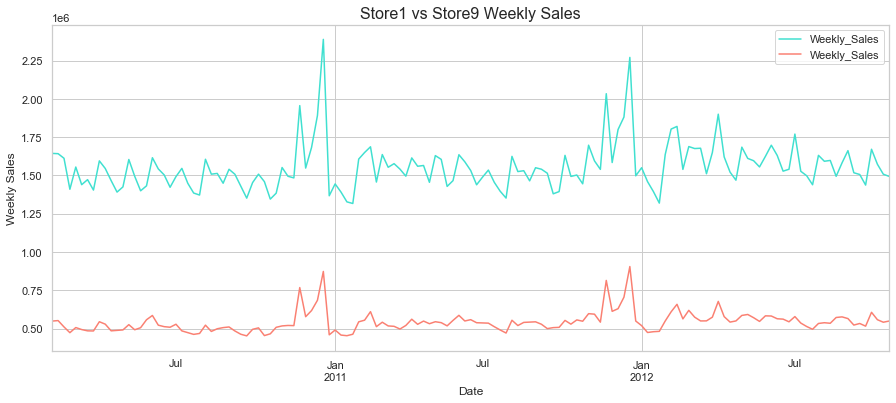

In [66]:
store9 = df[df['Store'] == 9]
sales9 = pd.DataFrame(store9['Weekly_Sales'].groupby(store9['Date']).sum())

store1 = df[df['Store'] == 1]
sales1 = pd.DataFrame(store1['Weekly_Sales'].groupby(store1['Date']).sum())

y1=sales1.Weekly_Sales
y2=sales9.Weekly_Sales
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store1 vs Store9 Weekly Sales', fontsize = '16')
plt.show()

<Figure size 432x288 with 0 Axes>

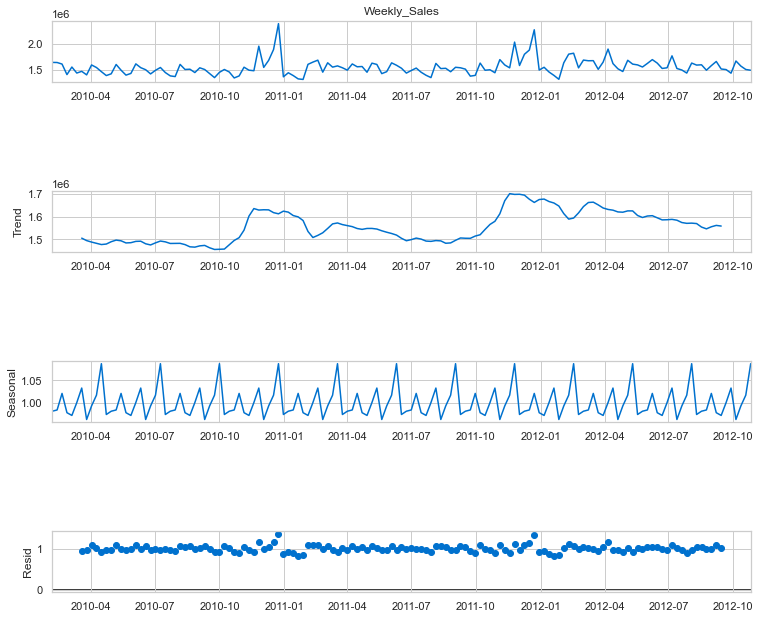

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales1.Weekly_Sales, period=12,model="multiplicative")  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

#### <u> Nhận xét</u>: 
Trend của 2 store khá tương tự nhau với peak point đều rơi vào những tháng cuối năm - khi có nhiều holiday nhất; bộ dataset có tính seasonality cao

### TimeSeries với Store 1 - ARIMA:

In [68]:
import copy
df_ts = copy.deepcopy(df)

In [69]:
df_ts

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


In [70]:
cond = (df_ts['Store']==1)
df_ts = df_ts.loc[cond]

In [72]:
df_ts = df_ts.drop(['Store', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day'], axis = 1)

In [73]:
#Set the index of the Month 
df_ts.set_index('Date',inplace=True)

In [74]:
df_ts

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [80]:
#Testing for stationarity
from pmdarima.arima import ADFTest,auto_arima
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_ts)

(0.01, False)

In [81]:
train = df_ts[:115]
test = df_ts[-28:]
# train 80% first, test 20% rest

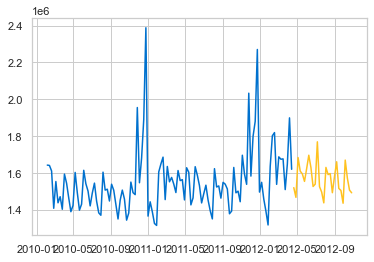

In [82]:
plt.plot(train)
plt.plot(test)

In [83]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2851.204, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2821.173, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2803.444, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2833.171, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2804.630, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2804.586, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2814.074, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=2806.583, Time=0.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2809.663, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2802.992, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2834.470, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2804.255, Time=0.25 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2804.203, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2814.676, Time=0.18 sec
 ARIMA(1,1,1)(1,1,2

In [84]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1397.496
Date:                            Sun, 23 Oct 2022   AIC                           2802.992
Time:                                    20:35:18   BIC                           2813.492
Sample:                                02-05-2010   HQIC                          2807.244
                                     - 04-13-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3322      0.359      0.924      0.355      -0.372       1.037
ma.L1         -0.6475      0.297     -2.179      0.029      -1.230      -0.065
ma.S.L12      -0.7051      0.151     -4.666      0.000      -1.001      -0.409
sigma2      5.885e+10   3.15e-12   1.87e+22      0.000    5.89e+10    5.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                26.69
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.38
Prob(H) (two-sided):                  0.96   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.81e+39. Standard errors may be unstable.
"""

In [85]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Date,
2012-04-20,1.606341e+06
2012-04-27,1.713688e+06
2012-05-04,1.765628e+06
2012-05-11,1.915640e+06
2012-05-18,1.674316e+06
2012-05-25,1.775775e+06
2012-06-01,1.779430e+06
2012-06-08,1.865806e+06
2012-06-15,1.680155e+06


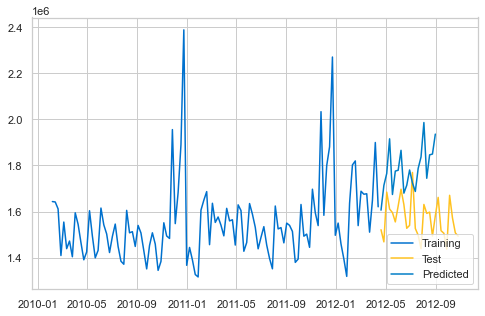

In [86]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower right')
plt.show()